In [1]:
df = pd.read_hdf('/home/klay6683/to_keep/l1a_dark_scan.h5', 'df')
# df = pd.read_hdf('/Users/klay6683/data/iuvs/l1a_dark_scan.h5', 'df')

## using previously defined clean up function

In [3]:
df = meta.clean_up_dark_scan(df)

#### creating little checking function:

In [4]:
def check_values(col):
    return df[col.upper()].value_counts(dropna=False)

In [5]:
df.columns

Index(['ANC_SVN_REVISION', 'BIN_PATTERN_INDEX', 'BIN_TBL', 'CADENCE',
       'CASE_TEMP', 'CHANNEL', 'CODE_SVN_REVISION', 'COLLECTION_ID',
       'DET_TEMP', 'DUTY_CYCLE', 'FILENAME', 'FOV_DEG', 'INT_TIME',
       'LYA_CENTROID', 'MCP_VOLT', 'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG',
       'MISSION_PHASE', 'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'N_FILL',
       'OBS_ID', 'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_ID', 'SOLAR_LONGITUDE',
       'TARGET_NAME', 'TIME_OF_INT', 'mean', 'median', 'std', 'BINNING_SET'],
      dtype='object')

In [26]:
check_values('collection_id')

limb           19085
disk           18143
corona          5646
cruise          4362
transition      3422
occultation      434
calibration      214
Name: COLLECTION_ID, dtype: int64

In [27]:
df[df.COLLECTION_ID=='cruise'].ORBIT_NUMBER.value_counts()

0    4362
Name: ORBIT_NUMBER, dtype: int64

## removing cruise and transition for being too special for now

In [28]:
df = df[df.COLLECTION_ID!='cruise']

In [29]:
df[df.COLLECTION_ID == 'transition'].index

DatetimeIndex(['2014-09-25 09:43:13.891360', '2014-09-25 15:54:30.068680',
               '2014-09-25 15:54:41.068690', '2014-09-24 06:52:52.196050',
               '2014-09-24 06:53:03.196060', '2014-09-24 06:53:14.196070',
               '2014-09-24 06:53:25.196080', '2014-09-24 06:53:36.196090',
               '2014-09-24 06:53:47.196100', '2014-09-24 06:53:58.196110', 
               ...
               '2014-09-23 16:21:45.863150', '2014-09-23 17:00:11.104480',
               '2014-09-22 13:57:12.164080', '2014-09-22 13:57:23.164090',
               '2014-09-25 05:10:03.439280', '2014-09-25 05:10:14.439290',
               '2014-09-23 23:29:42.783710', '2014-09-22 22:43:51.062320',
               '2014-10-14 13:47:56.696000', '2014-10-14 13:47:58.696000'],
              dtype='datetime64[ns]', name='TIME_OF_INT', length=3422, freq=None, tz=None)

In [30]:
df = df[df.COLLECTION_ID!='transition']

In [31]:
df = df.sort_index()

In [32]:
%matplotlib nbagg

In [33]:
import seaborn as sns

<IPython.core.display.Javascript object>


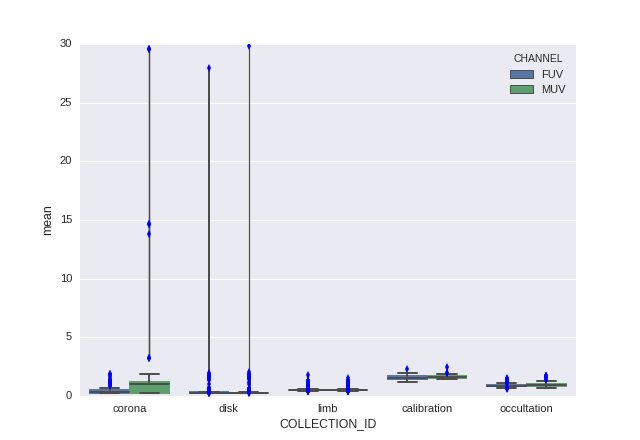

In [34]:
plt.figure()
sns.boxplot(x='COLLECTION_ID', y='mean', hue='CHANNEL', data=df)

<IPython.core.display.Javascript object>


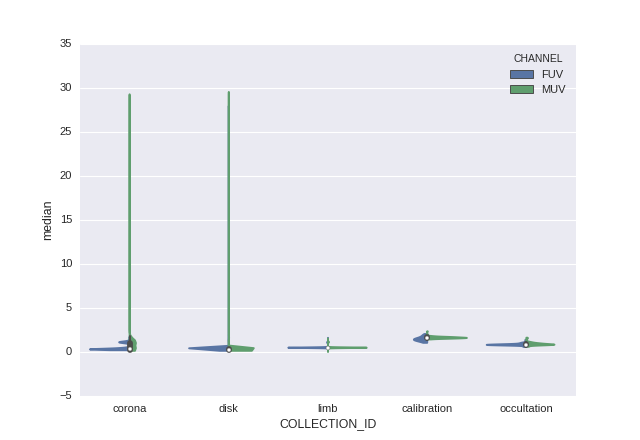

In [35]:
plt.figure()
sns.violinplot(x='COLLECTION_ID', y='median', hue='CHANNEL', data=df,
               split=True, cut=0)

<IPython.core.display.Javascript object>


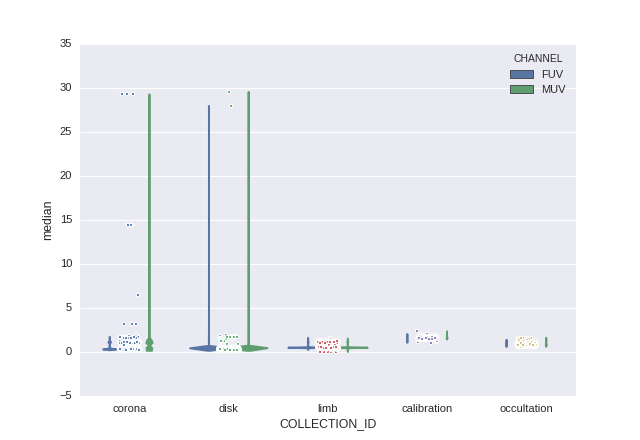

In [36]:
plt.figure()
sns.violinplot(x='COLLECTION_ID', y='median', data=df, hue='CHANNEL', inner=None,
               bw=.1, scale='count', scale_hue=False, cut=0)
sns.stripplot(x='COLLECTION_ID', y='median', data=df, jitter=True, size=3)

<IPython.core.display.Javascript object>


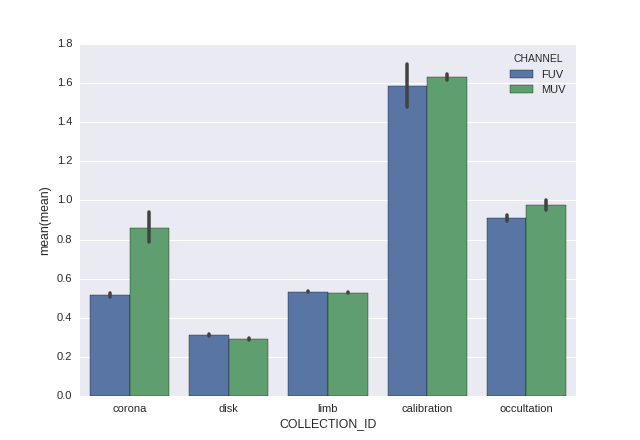

In [72]:
plt.figure()
sns.barplot(x='COLLECTION_ID', y='mean', hue='CHANNEL', data=df)

In [37]:
df = df[df.INT_TIME.isin([1.4, 4.2, 14.4])]

In [39]:
df = df.sort_values(by='INT_TIME')

<IPython.core.display.Javascript object>


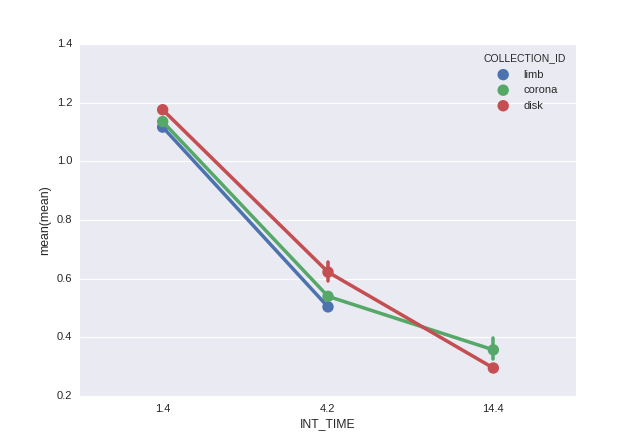

In [40]:
plt.figure()
sns.pointplot(hue='COLLECTION_ID', y='mean', x='INT_TIME', data=df)

In [39]:
%matplotlib inline

In [40]:
df.columns

Index(['ANC_SVN_REVISION', 'BIN_PATTERN_INDEX', 'BIN_TBL', 'CADENCE',
       'CASE_TEMP', 'CHANNEL', 'CODE_SVN_REVISION', 'COLLECTION_ID',
       'DET_TEMP', 'DUTY_CYCLE', 'FOV_DEG', 'INT_TIME', 'LYA_CENTROID',
       'MCP_VOLT', 'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG', 'MISSION_PHASE',
       'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'N_FILL', 'OBS_ID',
       'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_ID', 'SOLAR_LONGITUDE',
       'TARGET_NAME', 'mean', 'median', 'std', 'BINNING_SET'],
      dtype='object')

In [41]:
to_drop = []
for col in df:
    n_unique = len(df[col].unique())
    if n_unique == 1:
        print(col)
        print(df[col].unique())
        to_drop.append(col)
df = df.drop(to_drop, axis=1)

MCP_VOLT
[-1.83]
MISSION_PHASE
['PRIME']


In [42]:
df.INT_TIME.value_counts()/df.INT_TIME.size

14.4    0.516979
4.2     0.428252
1.4     0.054770
Name: INT_TIME, dtype: float64

<IPython.core.display.Javascript object>


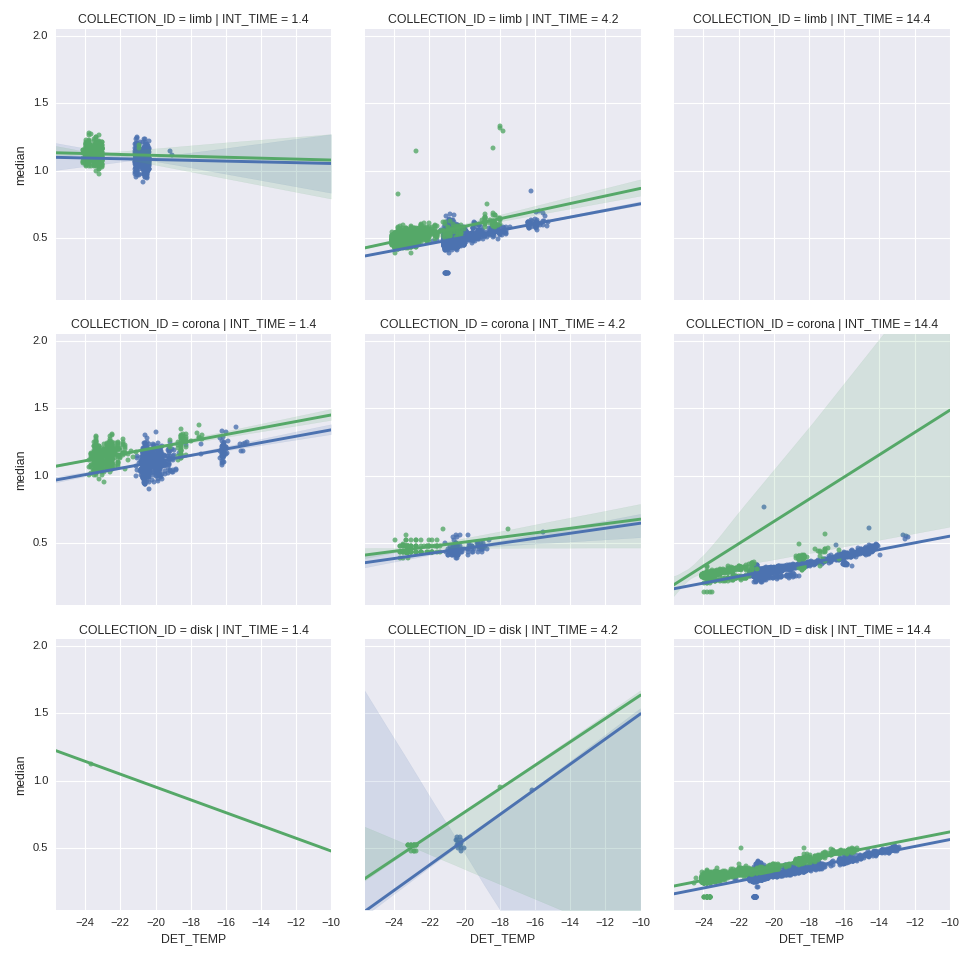

In [51]:
sns.lmplot(x='DET_TEMP', y='median', hue='CHANNEL',
           col='INT_TIME', row='COLLECTION_ID', data=df, size=4)

<IPython.core.display.Javascript object>


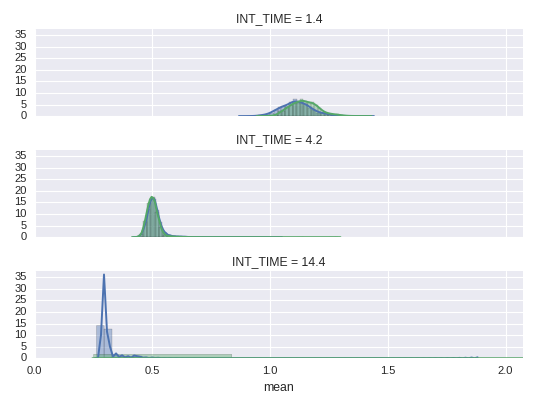

In [57]:
g = sns.FacetGrid(df, row='INT_TIME', hue='CHANNEL', size=1.7, aspect=4,)
g.map(sns.distplot, 'mean')

In [58]:
df.BINNING_SET = df.BINNING_SET.astype('category')

<IPython.core.display.Javascript object>


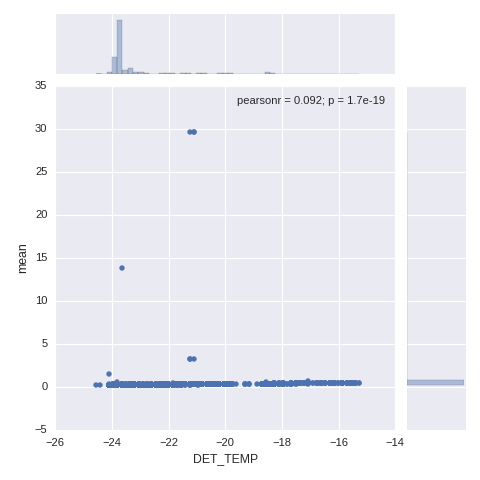

In [64]:
sns.jointplot(x='DET_TEMP',y='mean', data=df[(df.CHANNEL=='MUV') & (df.INT_TIME==14.4)])

In [48]:
s = df.PRODUCT_ID.str.split('_')
s = s.map(lambda x: x[3]).str.split('-')
df['activity'] = s.map(lambda x: x[0])

<IPython.core.display.Javascript object>


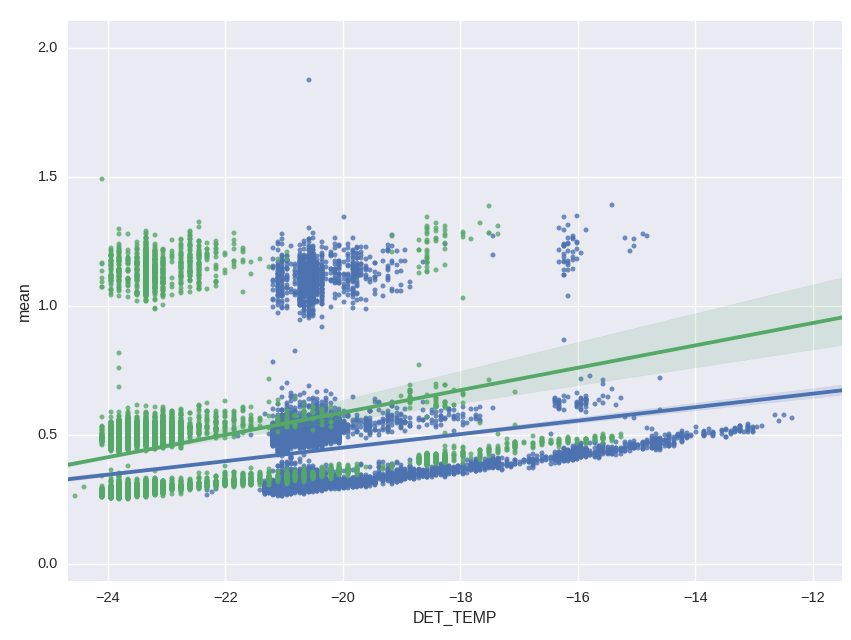

In [74]:
sns.lmplot(x='DET_TEMP', y='mean',hue='CHANNEL', data=df, aspect=1.33, size=8)

<IPython.core.display.Javascript object>


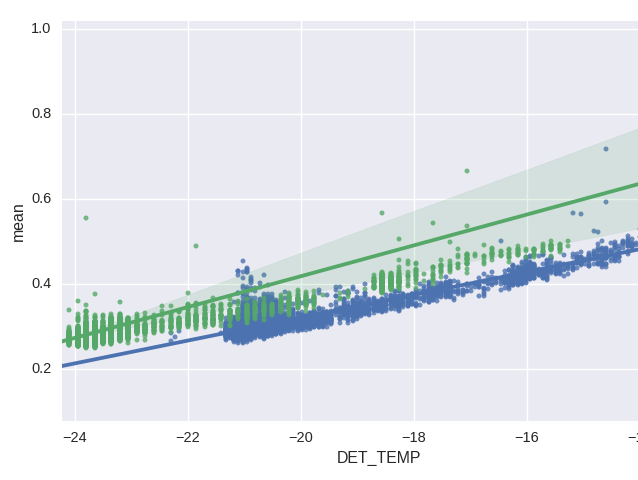

In [82]:
ax = sns.lmplot(x='DET_TEMP', y='mean',hue='CHANNEL', data=df[df.INT_TIME==14.4],
           aspect=1.33, size=6)
plt.gcf().tight_layout()

In [86]:
df.groupby(['INT_TIME','BINNING_SET']).size()

INT_TIME  BINNING_SET      
1.4       (0, 3, 880, 3)          4
          (0, 4, 89, 115)         4
          (0, 4, 96, 115)       164
          (0, 16, 0, 16)          2
          (2, 34, 96, 115)      133
          (52, 4, 89, 115)      293
          (52, 8, 89, 115)      850
          (140, 8, 96, 115)     850
4.2       (0, 1, 0, 1)           32
          (0, 1, 319, 11)       126
          (0, 1, 441, 11)       125
          (0, 4, 89, 115)      8484
          (0, 4, 96, 115)      4030
          (0, 16, 0, 16)          2
          (1, 4, 89, 115)       355
          (140, 4, 96, 115)    4830
14.4      (0, 1, 0, 1)           60
          (0, 1, 319, 11)        89
          (0, 1, 441, 11)        88
          (0, 4, 89, 80)       2372
          (0, 4, 89, 115)        10
          (0, 4, 96, 115)       296
          (0, 4, 101, 80)       380
          (0, 16, 0, 16)        106
          (1, 4, 89, 80)        514
          (2, 34, 96, 115)      150
          (2, 34, 101, 80)     3418


In [87]:
df.columns

Index(['ANC_SVN_REVISION', 'BIN_PATTERN_INDEX', 'BIN_TBL', 'CADENCE',
       'CASE_TEMP', 'CHANNEL', 'CODE_SVN_REVISION', 'COLLECTION_ID',
       'DET_TEMP', 'DUTY_CYCLE', 'FOV_DEG', 'INT_TIME', 'LYA_CENTROID',
       'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG', 'NAXIS', 'NAXIS1', 'NAXIS2',
       'NAXIS3', 'N_FILL', 'OBS_ID', 'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_ID',
       'SOLAR_LONGITUDE', 'TARGET_NAME', 'mean', 'median', 'std',
       'BINNING_SET', 'activity'],
      dtype='object')

<IPython.core.display.Javascript object>


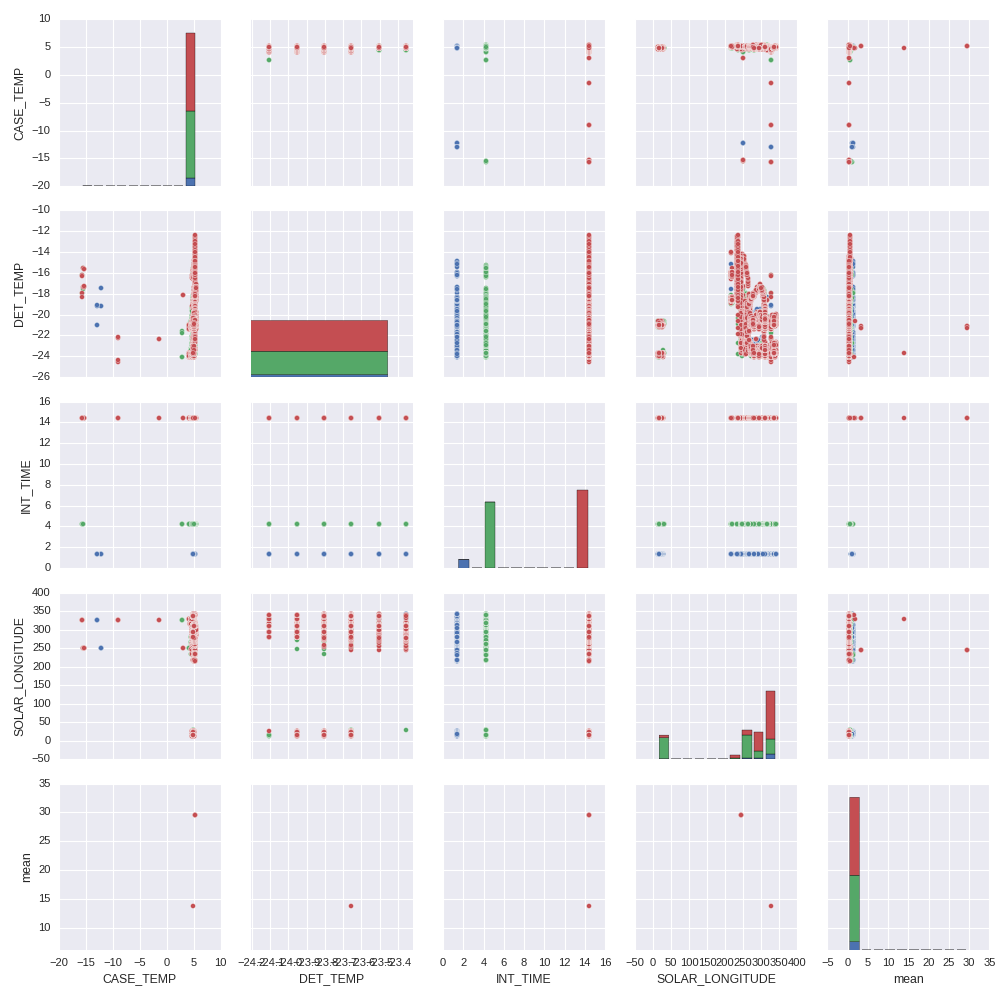

In [90]:
sns.set()
sns.pairplot(df['channel case_temp det_temp int_time solar_longitude'.upper().split() + ['mean']].dropna(),
             hue='INT_TIME')

In [75]:
df[df['mean']>1.0].COLLECTION_ID.value_counts()

corona    1439
limb       833
disk         4
Name: COLLECTION_ID, dtype: int64

In [76]:
df.COLLECTION_ID.value_counts()

limb      18599
disk      18118
corona     5277
Name: COLLECTION_ID, dtype: int64

In [65]:
sns.set_context('talk')

<IPython.core.display.Javascript object>


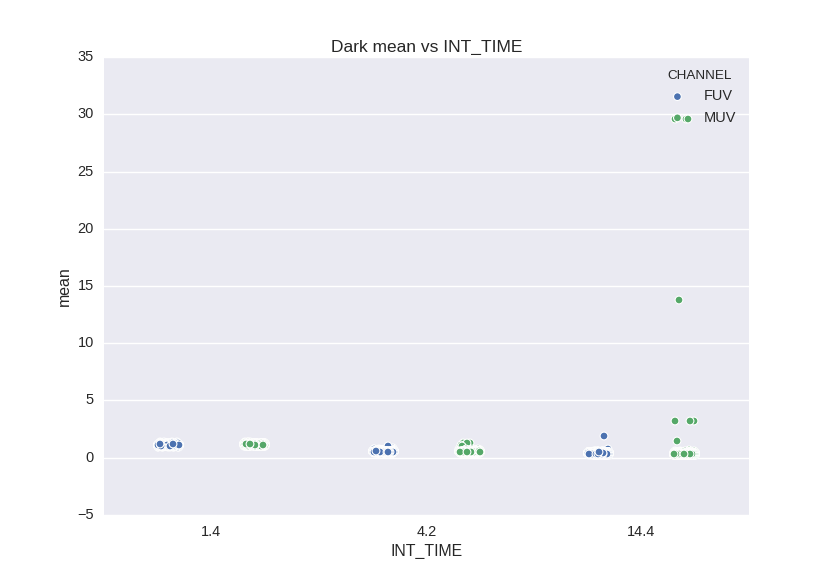

In [66]:
plt.figure()
ax = sns.stripplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
              jitter=True)
ax.set_title("Dark mean vs INT_TIME")

<IPython.core.display.Javascript object>


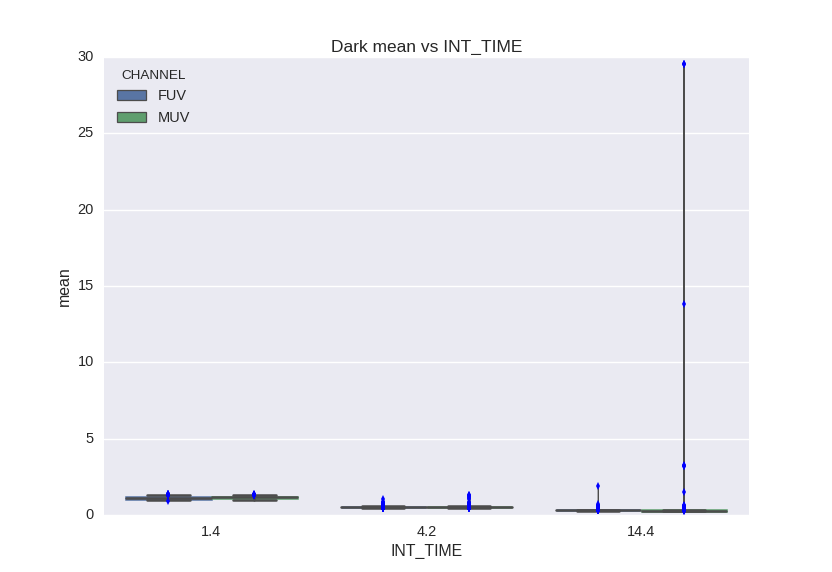

In [77]:
plt.figure()
ax = sns.boxplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
                )
ax.set_title("Dark mean vs INT_TIME")

  max_open_warning, RuntimeWarning)



<IPython.core.display.Javascript object>


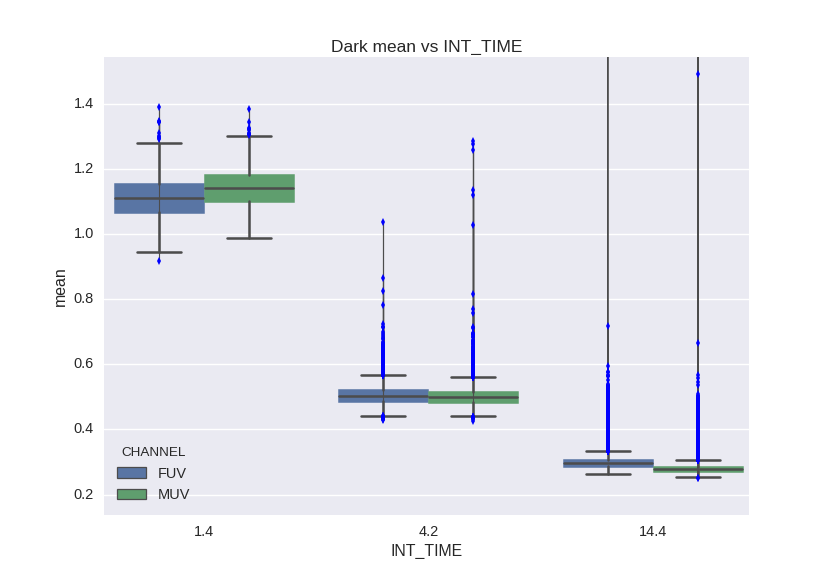

In [190]:
plt.figure()
ax = sns.boxplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
                )
ax.set_title("Dark mean vs INT_TIME")

  max_open_warning, RuntimeWarning)



<IPython.core.display.Javascript object>


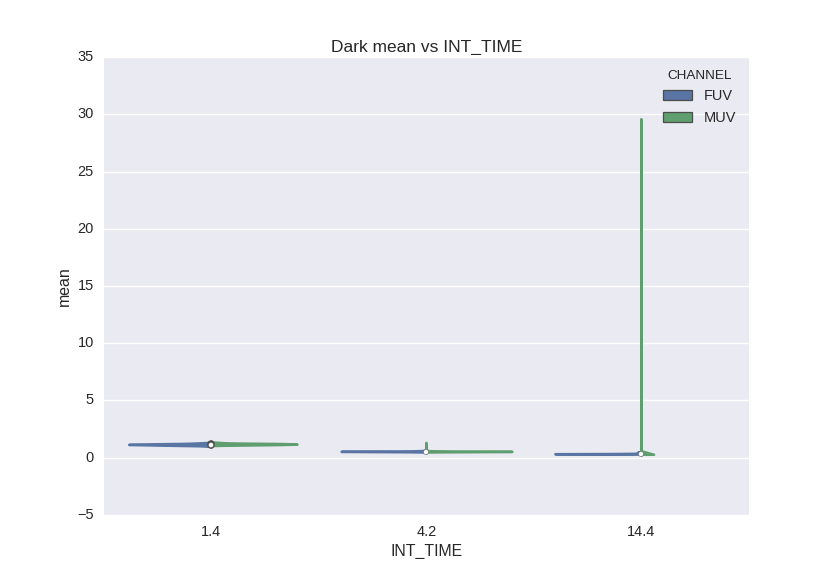

In [201]:
plt.figure()
ax = sns.violinplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
                   split=True, cut=0, scale='area')
ax.set_title("Dark mean vs INT_TIME")

In [202]:
sns.violinplot?

  max_open_warning, RuntimeWarning)



<IPython.core.display.Javascript object>


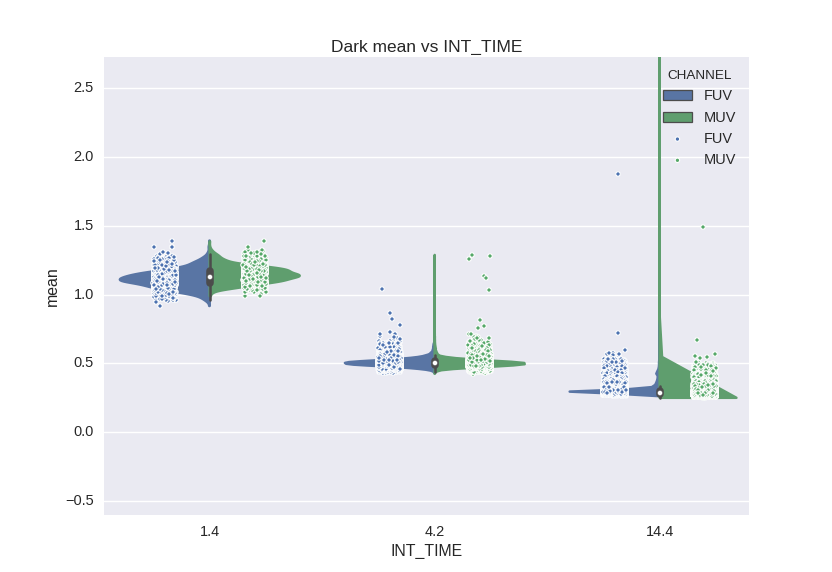

In [203]:
plt.figure()
ax = sns.violinplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
                   split=True, cut=0, scale='count')
sns.stripplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
              jitter=True, size=4)
ax.set_title("Dark mean vs INT_TIME")

In [158]:
sns.violinplot?

<IPython.core.display.Javascript object>


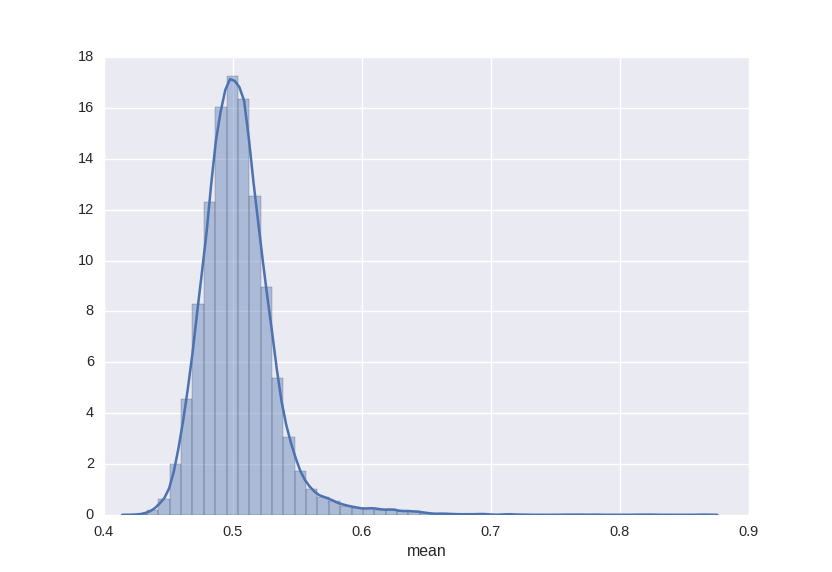

In [140]:
plt.figure()
sns.distplot(df.loc[(df.INT_TIME==4.2) & (df['mean']<1), 'mean'].dropna())

In [118]:
df.INT_TIME.value_counts()

14.4    21710
4.2     17984
1.4      2300
4.6       484
2.0       414
29.4      336
1.0       270
3.0        20
16.0        4
Name: INT_TIME, dtype: int64

In [173]:
df[df.INT_TIME==14.4]['mean'].dropna().size

21038

<IPython.core.display.Javascript object>


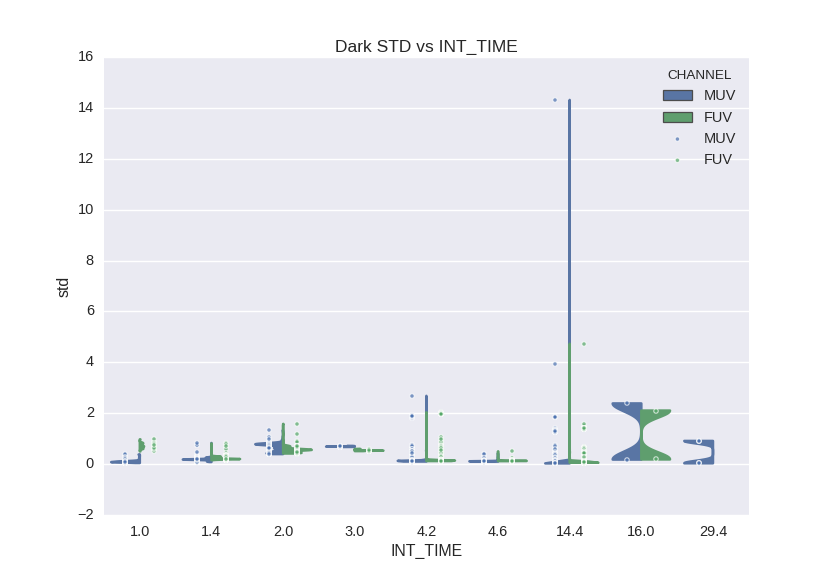

In [176]:
plt.figure()
ax = sns.violinplot(x='INT_TIME', y='std', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
                   split=True, cut=0, scale='count', inner=None, bw=.2)
sns.stripplot(x='INT_TIME', y='std', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
              jitter=False, alpha=0.7, size=4)
ax.set_title("Dark STD vs INT_TIME")

<IPython.core.display.Javascript object>


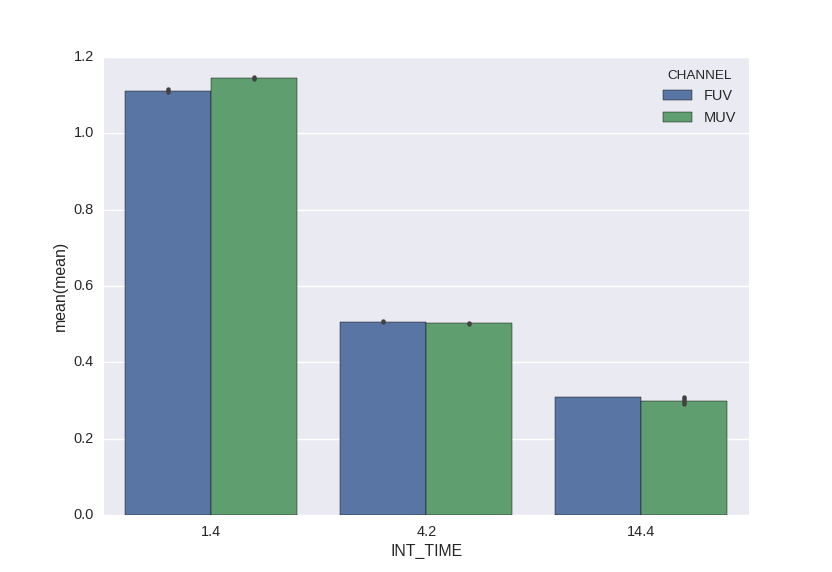

In [78]:
plt.figure()
sns.barplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'))

  max_open_warning, RuntimeWarning)



<IPython.core.display.Javascript object>


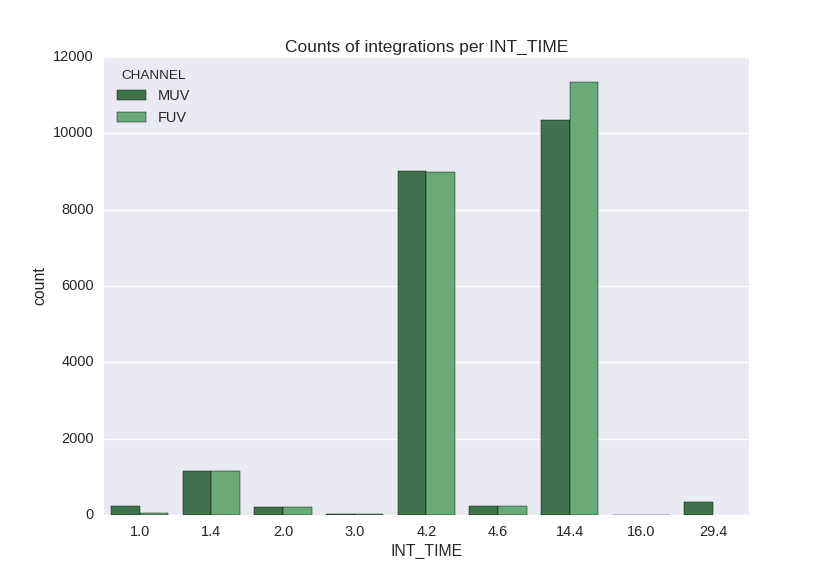

In [183]:
plt.figure()
ax = sns.countplot(x='INT_TIME', data=df.sort_values(by='INT_TIME'), palette='Greens_d',
                  hue='CHANNEL')
ax.set_title('Counts of integrations per INT_TIME')

In [184]:
df = df[df.INT_TIME.isin([1.4, 4.2, 14.4])]

  max_open_warning, RuntimeWarning)



<IPython.core.display.Javascript object>


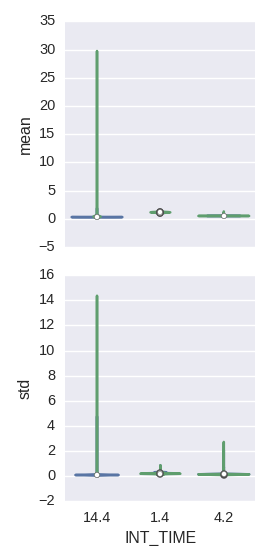

In [187]:
g = sns.PairGrid(df, x_vars=['INT_TIME'], hue='CHANNEL',
                y_vars=['mean','std'], size=3.5)
g.map(sns.violinplot)

## Compare with HK

In [57]:
from iuvs import hk

In [58]:
hkdb = pd.read_hdf('/home/klay6683/to_keep/HK_DB.h5', 'df')

<IPython.core.display.Javascript object>


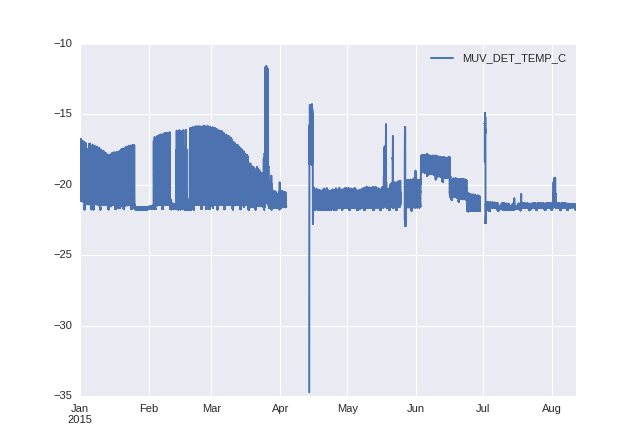

In [103]:
hkdb['2015'][['MUV_DET_TEMP_C']].resample('1min').plot()

In [32]:
check_values('lya_centroid')

 1    42653
-1     4291
dtype: int64

In [33]:
df.sort_index(inplace=True)

In [34]:
df.groupby(['CHANNEL', 'COLLECTION_ID','INT_TIME'])['median'].mean()

CHANNEL  COLLECTION_ID  INT_TIME
FUV      calibration    1.0          1.484199
         corona         1.0          1.632823
                        1.4          1.101343
                        4.2          0.458752
                        14.4         0.308992
         disk           1.0          1.536338
                        4.2          0.554363
                        14.4         0.289752
                        16.0        14.123057
         limb           1.0          1.609385
                        1.4          1.083330
                        4.2          0.488440
                        4.6          0.479429
         occultation    2.0          0.849249
                        3.0          0.603714
         transition     0.2          0.000010
                        1.0          1.459998
                        4.2          0.603271
                        6.0          0.506954
                        10.2         0.704095
                        14.4         0.173621
 

In [83]:
%matplotlib nbagg

In [92]:
df['mean'].max()

29.839017854461659

In [96]:
df[df['mean']> 20].filter(regex='NAXIS.')

,NAXIS1,NAXIS2,NAXIS3
TIME_OF_INT,,,
2014-12-01 04:38:26.089490,30,10,226
2014-12-01 18:24:42.437500,30,10,226
2014-12-02 08:10:57.528970,30,10,226
2015-07-25 18:41:07.308330,512,32,2
2015-07-25 18:41:07.308330,512,32,2


In [103]:
df[df['mean']> 20].PRODUCT_ID.values

array(['mvn_iuv_l1a_inbound-orbit00335-muvdark_20141201T034341_v02_r01',
       'mvn_iuv_l1a_inbound-orbit00338-muvdark_20141201T172957_v02_r01',
       'mvn_iuv_l1a_inbound-orbit00341-muvdark_20141202T071612_v02_r01',
       'mvn_iuv_l1a_apoapse-orbit01597-muvdark_20150725T184050_v02_r01',
       'mvn_iuv_l1a_apoapse-orbit01597-fuvdark_20150725T184050_v02_r01'], dtype=object)

<IPython.core.display.Javascript object>


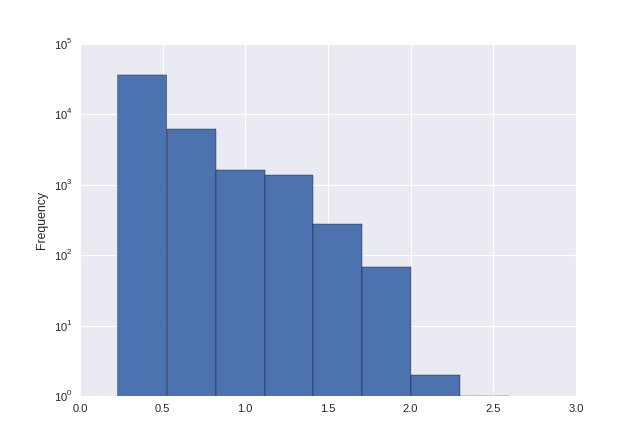

In [100]:
plt.figure()
df['mean'].plot(kind='hist', bins=100, logy=True, xlim=(0,3))

In [105]:
l1a = io.L1AReader('mvn_iuv_l1a_apoapse-orbit01597-muvdark_20150725T184050_v02_r01.fits.gz',
                   env='production')

In [106]:
l1a

Filename: mvn_iuv_l1a_apoapse-orbit01597-muvdark_20150725T184050_v02_r01.fits.gz
Environment: production
NAXIS : 3
NAXIS1 : 512
NAXIS2 : 32
NAXIS3 : 2

In [107]:
l1a.img.shape

(2, 32, 512)

In [108]:
l1a.img.mean()

15426.932983398438

In [ ]:
l1a.p 

In [79]:
df.groupby(['activity','COLLECTION_ID'])['mean'].mean()

activity      COLLECTION_ID
APP1          transition       1.417262
APP2          transition       0.620629
apoapse       disk             0.300909
centroid      calibration      1.625554
comet         transition       0.470771
early         transition       0.755636
inbound       corona           0.411287
occultation   occultation      0.942057
outbound      corona           0.835910
outboundhifi  corona           0.452791
outdisk       disk             0.290992
outdiskhifi   disk             0.622472
outlimb       limb             1.116697
periapse      limb             0.503505
periapsehifi  limb             0.505721
Name: mean, dtype: float64

In [34]:
cols_of_interest = df.columns.drop('anc_svn_revision  bin_tbl code_svn_revision obs_id'
                                   ' orbit_number process product_id'.upper().split())

In [35]:
# df.CHANNEL = df.CHANNEL.map(lambda x: 0 if x=='MUV' else 1)

In [36]:
df=df[cols_of_interest]
# df = df.select_dtypes(include=[float, int])
# df= df.drop('SW_VER NAXIS3'.split(), axis=1)

In [37]:
df = df.dropna(how='any')

In [38]:
df.to_hdf('/Users/klay6683/data/iuvs/dark_stuff/to_study.h5','df')

your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['BIN_PATTERN_INDEX', 'CHANNEL', 'COLLECTION_ID', 'MISSION_PHASE', 'TARGET_NAME', 'BINNING_SET']]

  warnings.warn(ws, PerformanceWarning)



In [40]:
df.head()

,CADENCE,CASE_TEMP,CHANNEL,DET_TEMP,DUTY_CYCLE,FOV_DEG,INT_TIME,LYA_CENTROID,MCP_VOLT,MIRROR_DEG,MIRROR_DN,MIR_DEG,NAXIS,NAXIS1,NAXIS2,N_FILL,SOLAR_LONGITUDE,mean,median,std
TIME_OF_INT,,,,,,,,,,,,,,,,,,,,
2013-12-04 19:02:17.420740,2,14456,5,2351,1,-48.581543,1,1,622.322,-24.290771,4095,-24.288,2,128,128,0,58.333862,241.076477,229,75.493331
2013-12-04 19:02:17.420740,2,14456,0,2402,1,-48.581543,1,1,497.638,-24.290771,4095,-24.288,2,128,128,0,58.333862,213.668213,202,66.896731
2013-12-04 19:03:04.420770,2,14455,5,2351,1,-48.581543,1,1,622.322,-24.290771,4095,-24.288,2,128,128,0,58.334099,23373.713318,24218,6042.129036
2013-12-04 19:03:04.420770,2,14455,0,2400,1,-48.581543,1,1,497.638,-24.290771,4095,-24.288,2,128,128,0,58.334099,17524.360107,17720,4284.540316
2014-04-25 00:07:44.265320,61,15825,5,2361,1,0.494385,60,-1,-1.830,0.247192,13029,0.250,2,512,256,0,121.203468,520.624687,436,348.122660


# Odd things

## Difference between MIRROR_DEG and MIR_DEG

In [80]:
df['mirdeg_delta'] = df.MIRROR_DEG - df.MIR_DEG

<IPython.core.display.Javascript object>


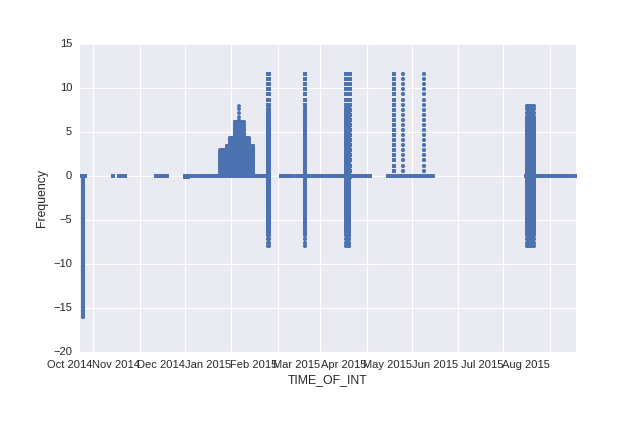

In [81]:
plt.figure()
df.mirdeg_delta.plot(style='.')